# Western African Music Regression: What Makes it So Great?
![A Image of the famous West African Musican known as King Sunny Ade](kingsunnyade.jpeg)

# Abstract
As a Nigerian-American boy from New Jersey, I have always had a fascination with Nigeria but have never once visited due to the cost and lack of time. My interest in Nigerian culture still persists and spikes whenever I go to a Nigerian party where the music and food is completley and utterly West African. My curiousty when it comes to data has overlapped with my interst in music. I would like now expolore the audio feature of West African music and what makes it so unique.
This notebook sets out to find a linear relationship between the popularity of West African music and other audio features. Due to facing diffculties with extracting the Popularity feature, danceability is used instead due to having a direct relationship with popularity. Credentials are needed like the Cerfication ID and the Secret Key found in the Spotify API if you have an account and is needed for replication. Also the libraires used are the Spotipy library,Pandas, Sklearn, and Matplotlib. The methods used were to check for any missing values, concating multiple playlists, fitting for linear regression, and then checking the score or R^2 value. If done again I would like more value to be used and to somehow find access to popularity. No relationship was actually found in the end was a bad assumption to think that music was so straightforward in the first place. 

# Introduction
When you think of West African music, what comes to mind? Is it the drums, or the foreign language, or the complete difference in amount of time a song lasts lasts? Some might not be aware but West African music is defined as music from the Western Region of Africa specfically Nigeria, Ghana, Niger, and Senegal, and Sierra Leone. The music is known for  its specfic drums and string ensemble. The objective of this notebook is to explore and identify the unique audio features of the music of this region and see if there are any audio features that pop out.    

In [1]:
pip install spotipy


Note: you may need to restart the kernel to use updated packages.


# Research Question 
What is it about West African Music that makes it so distinct. I want to find the relationship between its danceiblity(popularity) and other audio features, if there is any. 

Using Spotipy, and your own creditial ID and Secret key given to you when you ask to use Spotify's API using your own account.

# Exploratory Data Analysis 
In this Section we explore the data from the two playlists and see the data in its table form. After we see the spread in values of each numerial audio feature by ploting box plots for each one. After we check for null values. No null values are found. 

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#cid = Config'YOUR CID'
#secret = config'YOUR SECRET KEY'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)


In [3]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name","track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [4]:
#/tl = Timeloop()

#if __name__ == "__main__":
   # tl.start(block=True)

In [5]:
import pandas as pd
df = analyze_playlist("jonasfromfalun", "5kfE1hGYhu97qxW3n6h4S6")
df.head()




,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Celestine Ukwu & His Philosophers National,Celestine Ukwu & His Philosophers National,Na Nchekwube Mma Anyi Egbuna Anyi,6juKcgi75Q5uFWDyAZr1Mq,0.450,0.622,0,-5.849,1,0.0411,0.000010,0.1380,0.738,179.203,377640,3
1,T. P. Orchestre Poly-Rythmo,The Kings of Benin Urban Groove 1972 - 80,Gendamou Na Wili We Gnannin,3YLHbTeEBFvEBWZQATebxE,0.654,0.610,5,-9.846,0,0.0485,0.007190,0.0843,0.953,87.433,372347,4
2,Marijata,This Is Marijata,I Walk Alone,6sVm6ik1mXyXlDFexORZpQ,0.565,0.433,4,-14.970,0,0.0393,0.225000,0.0909,0.746,137.269,644440,4
3,Various Artists,"Golden Afrique, vol. 1 (Bolibana Collection)",Thiely,2QbgkbCilqYgE7uItsTmf0,0.813,0.566,1,-6.986,0,0.0588,0.000007,0.1730,0.957,147.427,249627,4
4,Various Artists,"Golden Afrique, vol. 1 (Bolibana Collection)",Yaye Boye,5acvGp7BKrh2pFw8WpgYNi,0.604,0.416,1,-8.559,0,0.0405,0.200000,0.1070,0.609,91.036,296000,4


In [6]:
sp.search(q='id:2QbgkbCilqYgE7uItsTmf0', type='track', limit=50,offset=0)



{'tracks': {'href': 'https://api.spotify.com/v1/search?query=id%3A2QbgkbCilqYgE7uItsTmf0&type=track&offset=0&limit=50',
  'items': [],
  'limit': 50,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0}}

In [7]:
df.to_csv("wow.csv", index = False)

In [8]:
df2 = analyze_playlist("sagbelese","3SAf6UuMRLX7xJAWdYibNV")
df2.head()


,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Adekunle Gold,Before You Wake Up,Before You Wake Up,684hZgWhW3ZfCzSnlBtyBC,0.629,0.821,8,-3.400,0,0.1700,0,0.4110,0.715,63.590,174500,5
1,Teni,Askamaya,Askamaya,54MONNKu7yBK7w9LBVQ7vx,0.816,0.778,9,-2.702,0,0.0622,5.47e-06,0.0833,0.726,116.038,175961,4
2,Rema,Rema,Dumebi,1sBX7EfLOgP3u6gHJBSqQg,0.922,0.666,3,-4.970,0,0.0609,0.00386,0.1050,0.700,110.015,179775,4
3,Burna Boy,Anybody,Anybody,4cyUTdVRJNxjcI9W4TezDW,0.864,0.877,6,-2.418,0,0.0644,1.46e-05,0.0831,0.686,103.985,189107,4
4,Mut4y,Turn Me On,Turn Me On,2fy4RMx6PxjMIW19puNOTs,0.521,0.625,9,-6.468,0,0.1070,0.03,0.1050,0.839,142.463,192052,5


In [9]:
 frames = [df, df2]

result = pd.concat(frames)
result.head()
result.shape
df.shape

(100, 16)

In [10]:
df.shape
df2.shape

(100, 16)

danceability           AxesSubplot(0.125,0.772143;0.227941x0.107857)
energy              AxesSubplot(0.398529,0.772143;0.227941x0.107857)
key                 AxesSubplot(0.672059,0.772143;0.227941x0.107857)
loudness               AxesSubplot(0.125,0.642714;0.227941x0.107857)
mode                AxesSubplot(0.398529,0.642714;0.227941x0.107857)
speechiness         AxesSubplot(0.672059,0.642714;0.227941x0.107857)
instrumentalness       AxesSubplot(0.125,0.513286;0.227941x0.107857)
liveness            AxesSubplot(0.398529,0.513286;0.227941x0.107857)
valence             AxesSubplot(0.672059,0.513286;0.227941x0.107857)
tempo                  AxesSubplot(0.125,0.383857;0.227941x0.107857)
duration_ms         AxesSubplot(0.398529,0.383857;0.227941x0.107857)
time_signature      AxesSubplot(0.672059,0.383857;0.227941x0.107857)
Target                 AxesSubplot(0.125,0.254429;0.227941x0.107857)
dtype: object

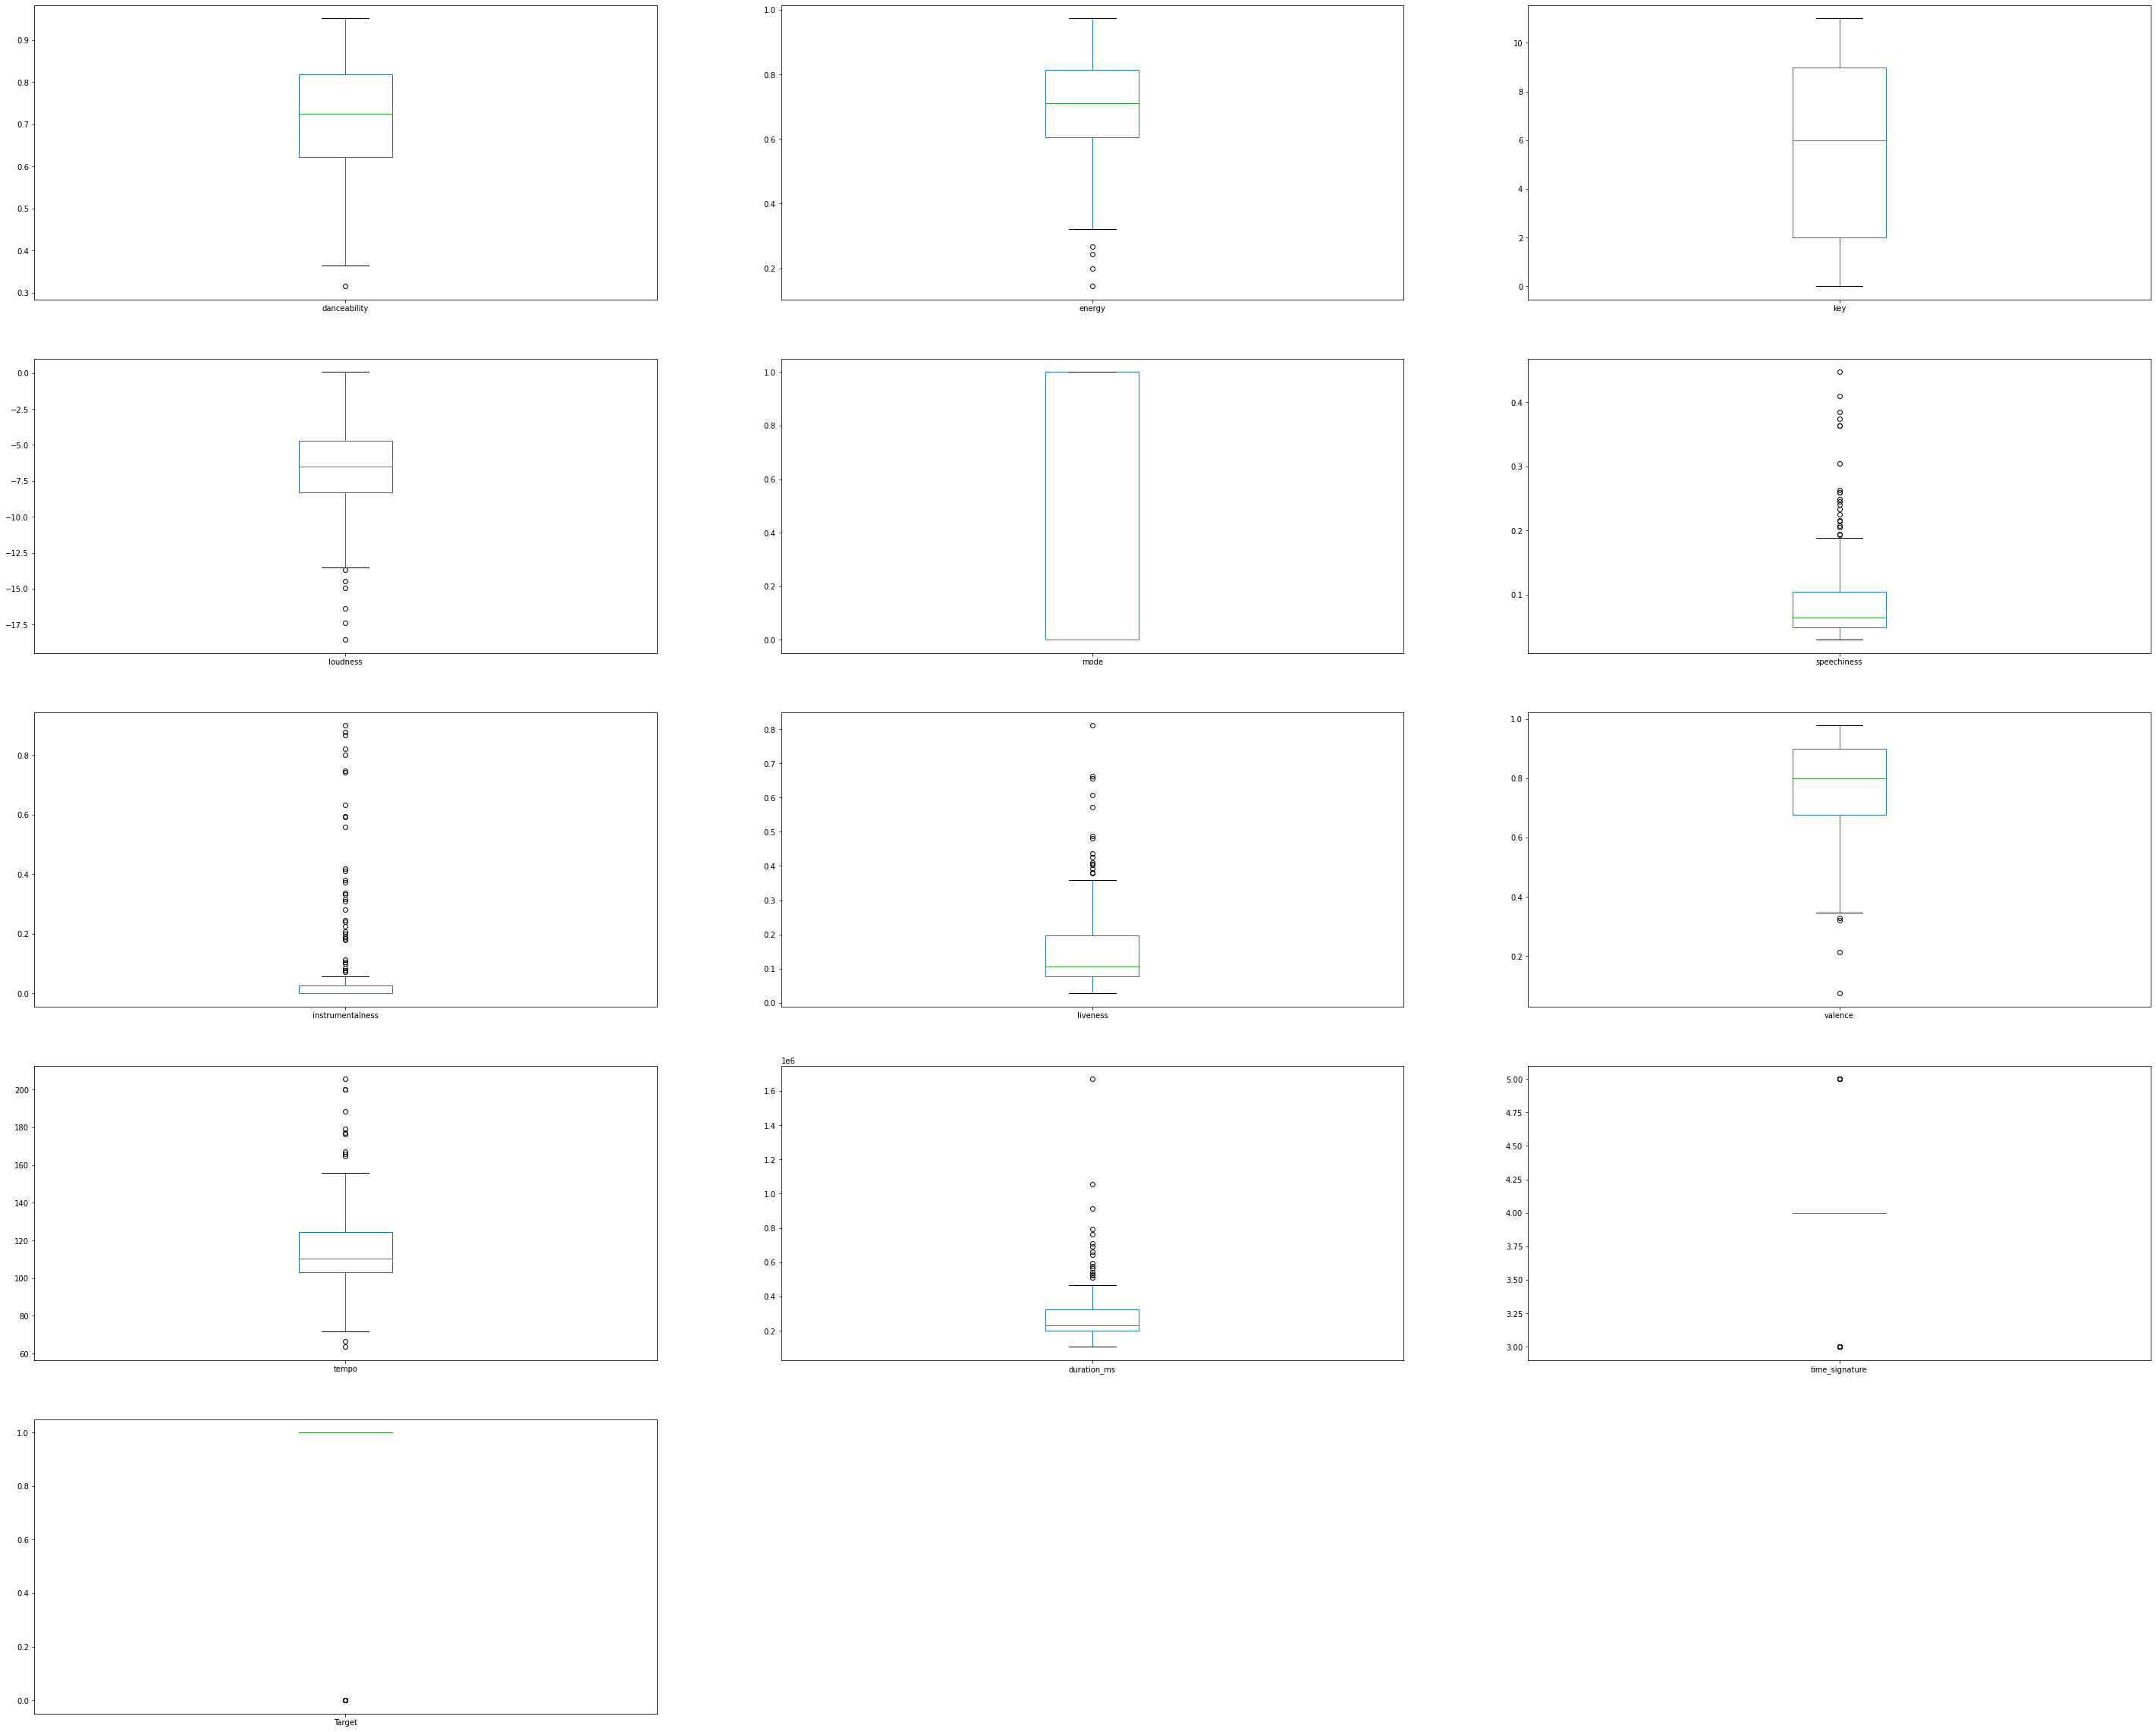

In [38]:
result.plot.box(subplots=True, layout=(6,3), figsize=(50, 50))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839cc2a9a0>,
      dtype=object)

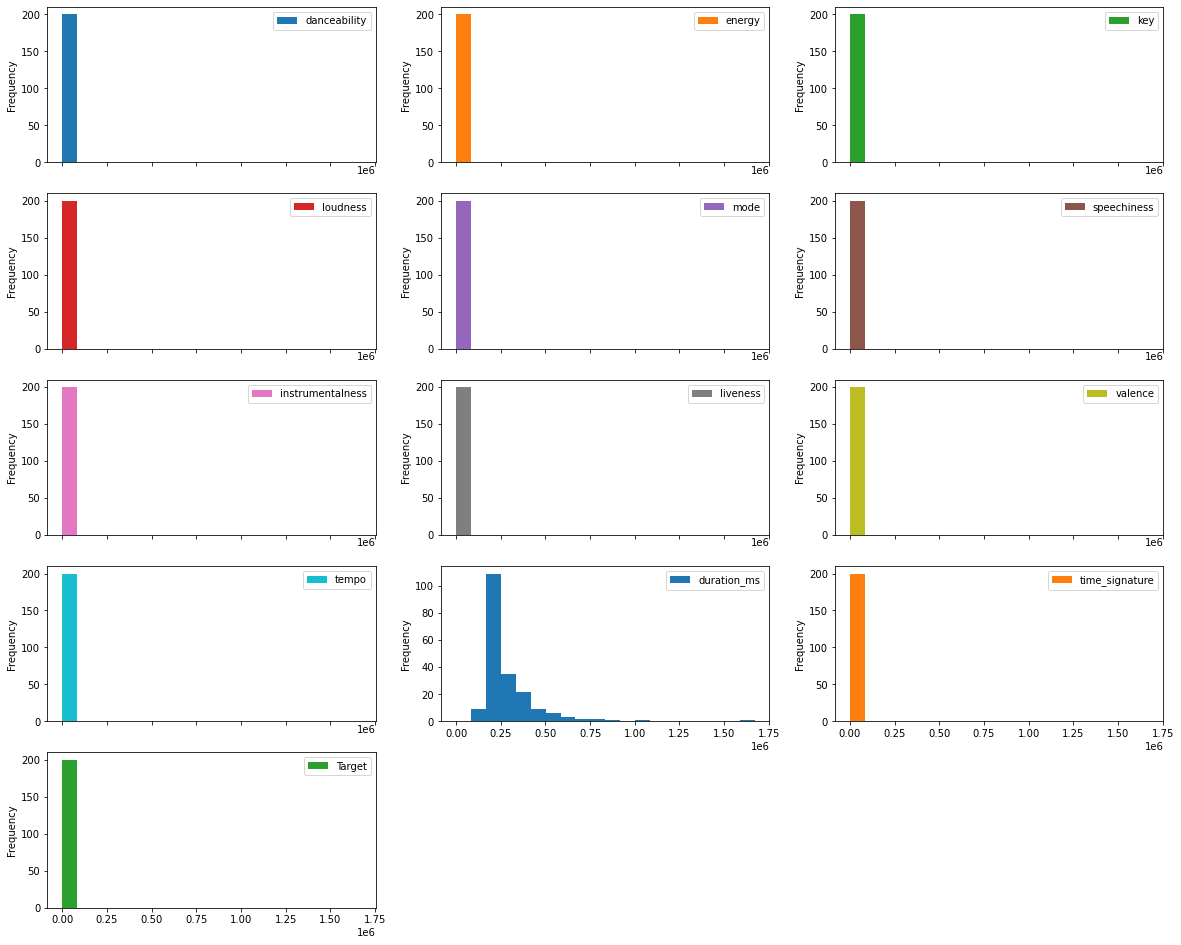

To make sure the merge happened correctly leaving no blank features for any song 

In [11]:
result[result['artist'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [12]:
result[result['album'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [13]:
result[result['track_name'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [14]:
result[result['track_id'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [15]:
result[result['danceability'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [16]:
result[result['energy'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [17]:
result[result['key'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [18]:
result[result['loudness'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [19]:
result[result['mode'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [20]:
result[result['speechiness'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [21]:
result[result['instrumentalness'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [22]:
result[result['liveness'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [23]:
result[result['valence'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [24]:
result[result['tempo'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [25]:
result[result['duration_ms'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


In [26]:
result[result['time_signature'].isna()]

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature


# Data Cleaning
Data cleaning is not required due to all the tracks having no null values and the Spotify data extracted being clean.

# Feature Engineering 
Using the title of target the danceability is considered good if its above .5 and considered bad if its below .5.  

In [27]:
result['Target'] = result.danceability.map(lambda x: 1 if x >= .5 else 0)

# Modeling
# #The Relationship Between Danceability and Energy
To find the relationship I want to use a linear regression which will find the numerical value of the audio feature in this case being energy, tempo, and valence.  

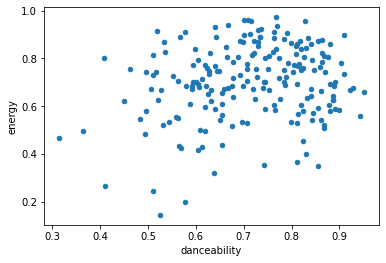

In [28]:
import matplotlib.pyplot as plt
result.plot.scatter(x='danceability', y='energy');


From the Scatter Plot, we can see that the danceability vs the energy rating has a fair amount of points in the upper right region. However, there is a wide spread throughout the graph.  

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(result[["energy"]], result.danceability)
print(lr.intercept_, lr.coef_)


0.6033157796902184 [0.15741767]


# Model Evaluation

In [30]:
lr.score(result[["energy"]], result.danceability)

0.0375136695816638

From our R2 also know as our coefficent of detrimaination, we found in cell 46 that the value of the relationship between energy and dancibility is not present is 0.0375136695816638. R2 is usually a number between 1 and 0. The higher the number the greater the relationship, the number we gathered is particullariy low indicating there is not really a relationship between the two numbers.  

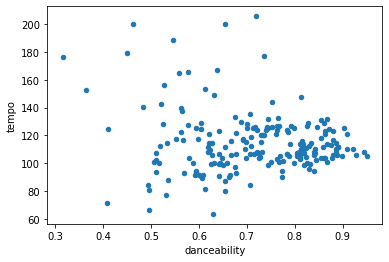

In [31]:
result.plot.scatter(x='danceability', y='tempo');

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(result[["tempo"]], result.danceability)
print(lr.intercept_, lr.coef_)


0.7955994614158068 [-0.0007155]


In [34]:
lr.score(result[["tempo"]], result.danceability)

0.015161651456527703

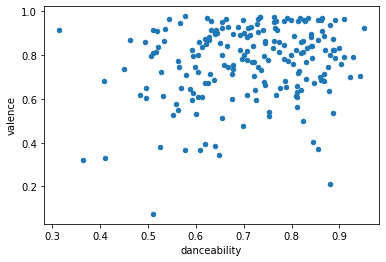

In [32]:
result.plot.scatter(x='danceability', y='valence');

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(result[["valence"]], result.danceability)
print(lr.intercept_, lr.coef_)

0.6072635245104916 [0.13841501]


In [37]:
lr.score(result[["valence"]], result.danceability)

0.032797374865443873

# Conclusion
There is no relationship between audio features and popularity. Next time the sample size will be larger. 